## Time Series Data analysis in python

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dateutil.parser import parse
#
df =  pd.read_csv('time.csv',parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


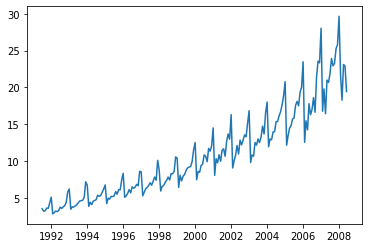

In [2]:
plt.plot(df.date,df.value)
plt.show()

In [3]:
for c in df.date:
        print(c.year)

1991
1991
1991
1991
1991
1991
1992
1992
1992
1992
1992
1992
1992
1992
1992
1992
1992
1992
1993
1993
1993
1993
1993
1993
1993
1993
1993
1993
1993
1993
1994
1994
1994
1994
1994
1994
1994
1994
1994
1994
1994
1994
1995
1995
1995
1995
1995
1995
1995
1995
1995
1995
1995
1995
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1996
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1997
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
1999
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2001
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2002
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2003
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2005
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2006
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2007
2008
2008


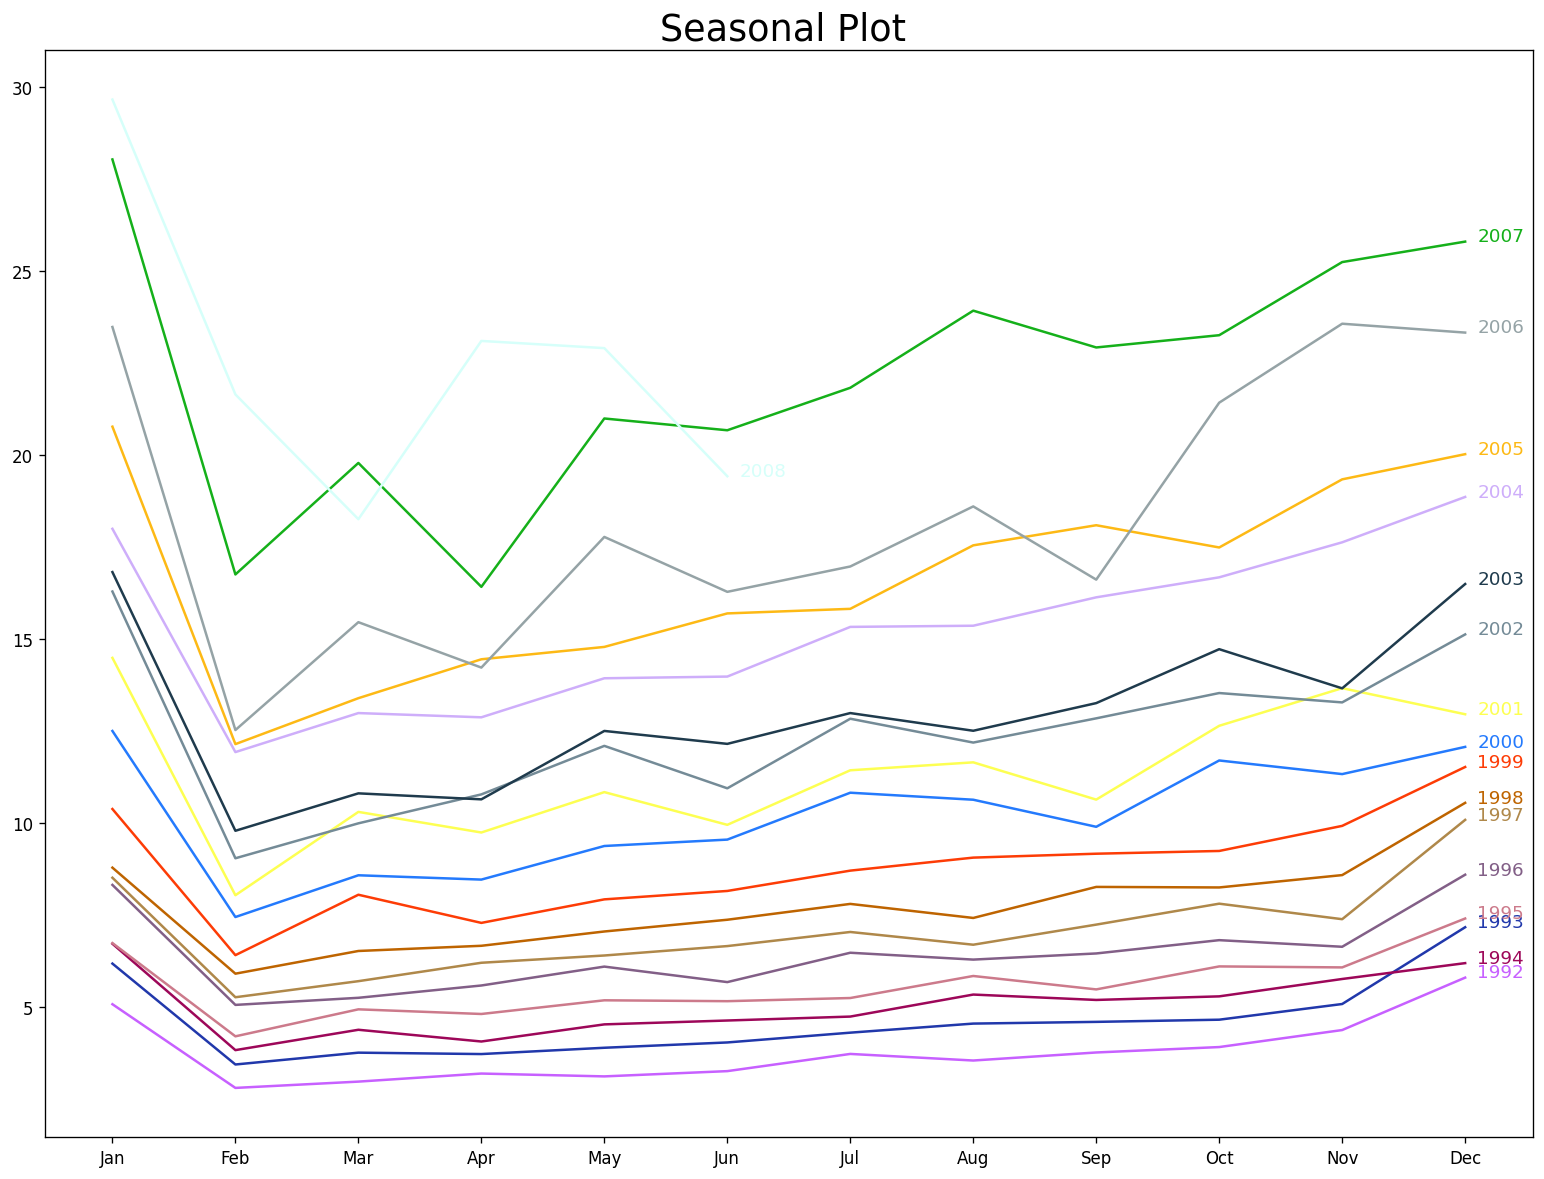

In [4]:
"""
Plot the data with respect to months and value
with a line graph for each year
"""
import numpy as np
import matplotlib as mpl
df =  pd.read_csv('time.csv',parse_dates=['date'],index_col='date')
df.reset_index(inplace=True)
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

np.random.seed(100)
mycol = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()),len(years), replace=False)

plt.figure(figsize=(16,12),dpi=120)
for i,y in enumerate (years):
    if i>0:
        plt.plot('month','value',data=df.loc[df.year==y,:], color=mycol[i],label=y)
        plt.text(df.loc[df.year==y,:].shape[0]-.9,df.loc[df.year==y,'value'][-1:].values[0],y,color=mycol[i],fontsize=11)

plt.title("Seasonal Plot ",fontsize=22)
plt.show()


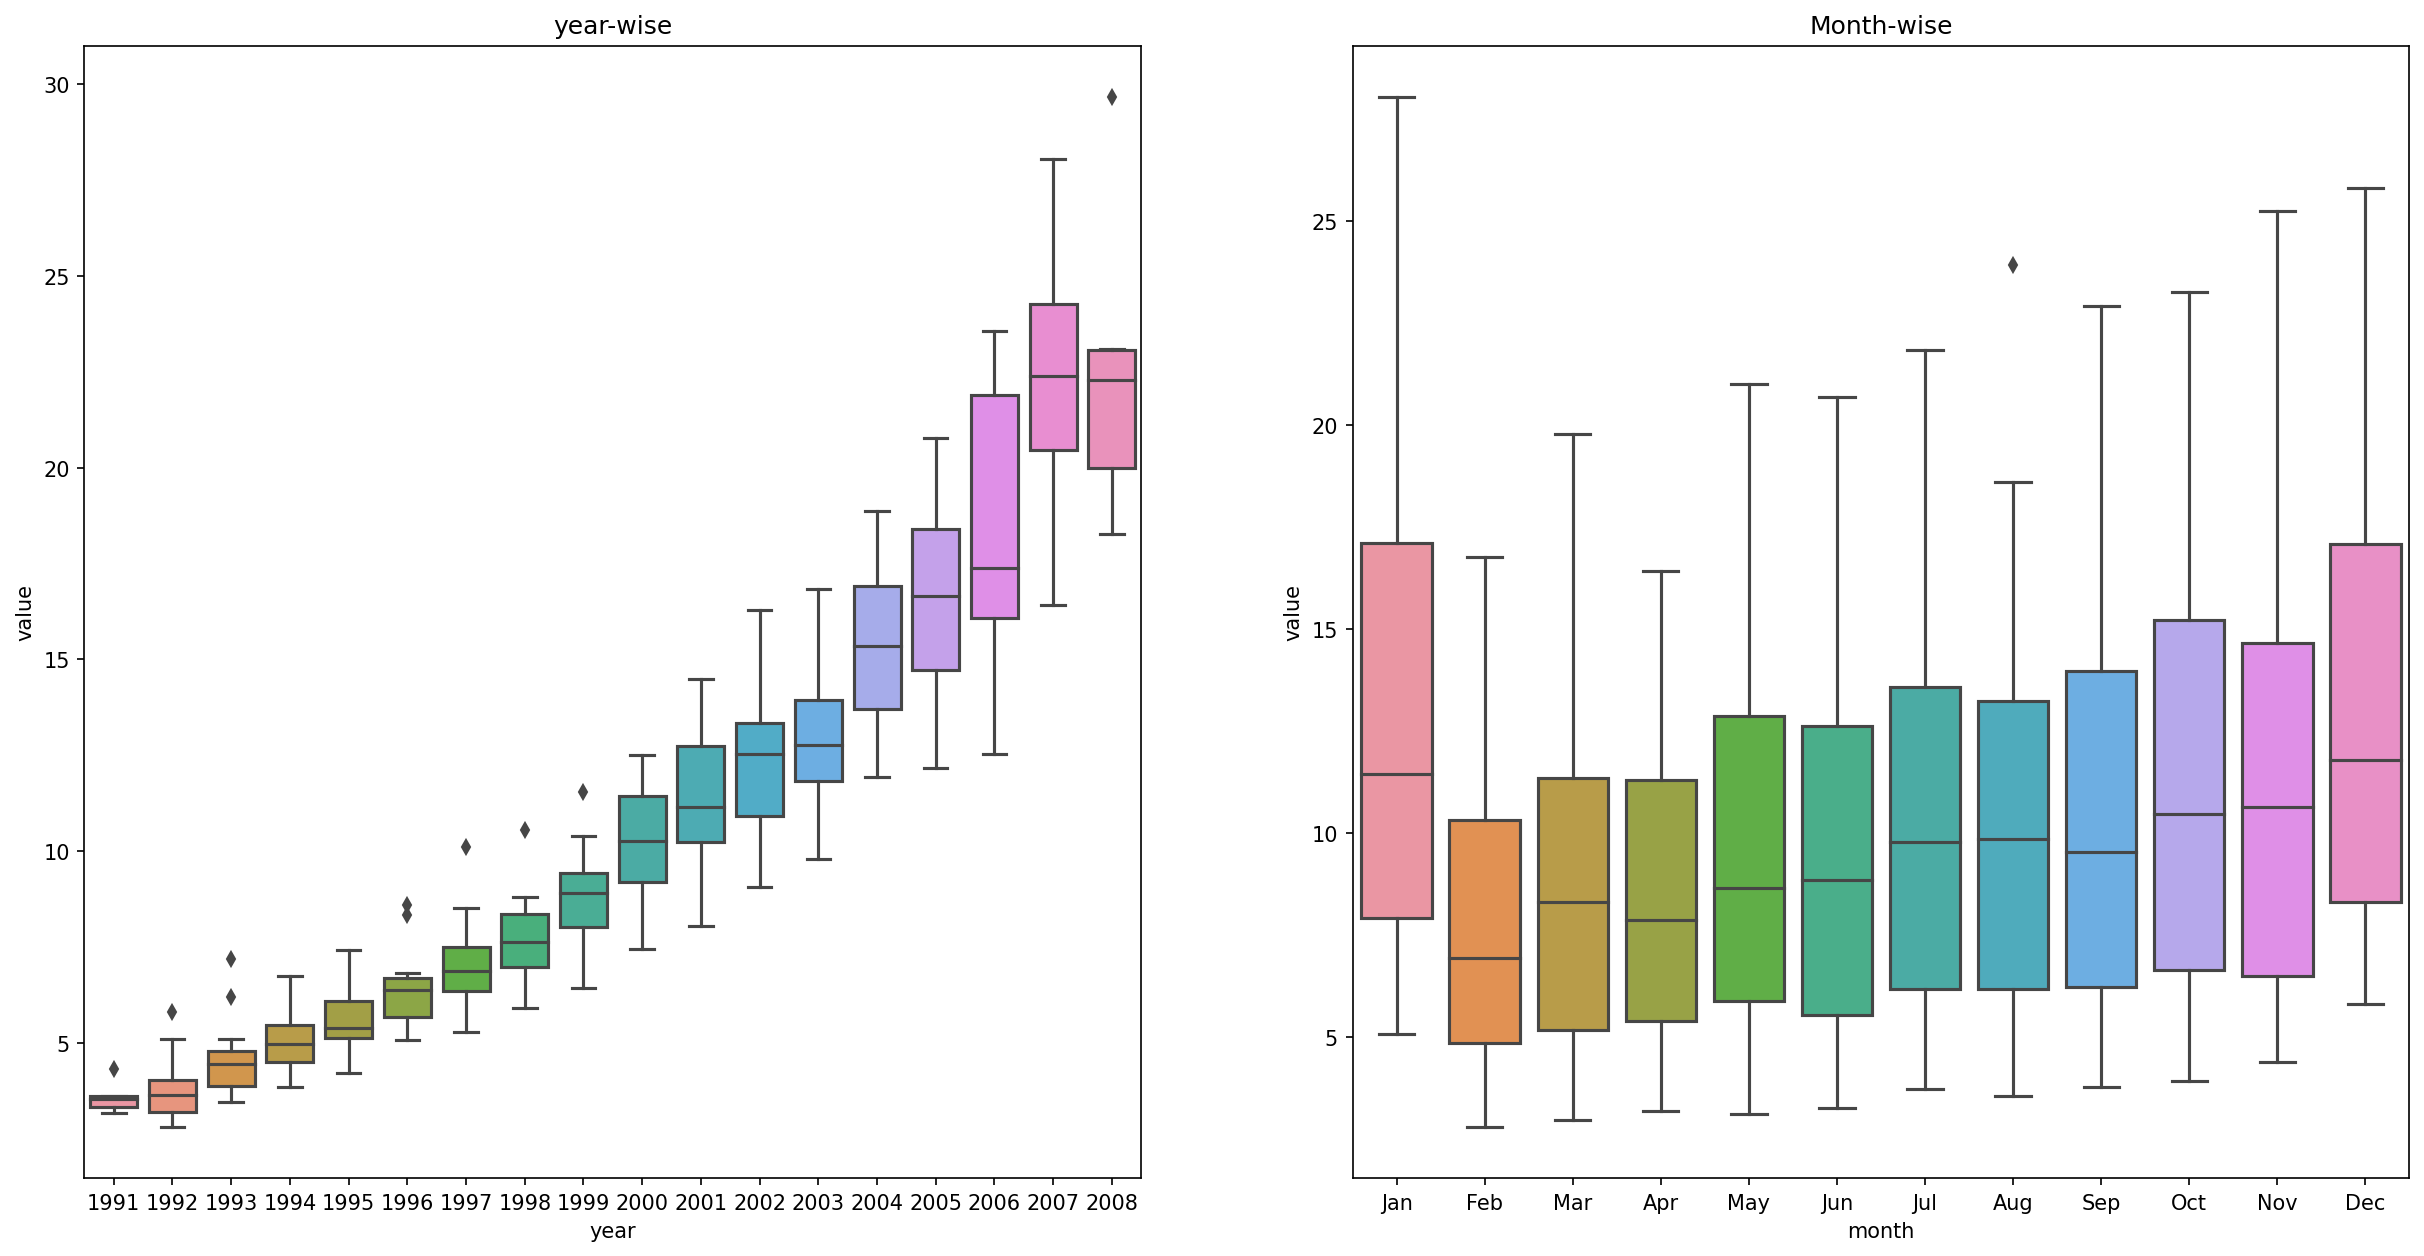

In [5]:
"""
Box plot of seasonal and yearwise data
"""
df =  pd.read_csv('time.csv',parse_dates=['date'],index_col='date')
df.reset_index(inplace=True)
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

fig,axe = plt.subplots(1,2,figsize=(20,10),dpi=150)
sns.boxplot(x='year',y='value',data=df,ax=axe[0])
sns.boxplot(x='month',y='value', data=df.loc[~df.year.isin([1991,2008]),:])
axe[0].set_title("year-wise")
axe[1].set_title("Month-wise")
plt.show()

<AxesSubplot:title={'center':'Trend and Seasonality Only'}, xlabel='date'>

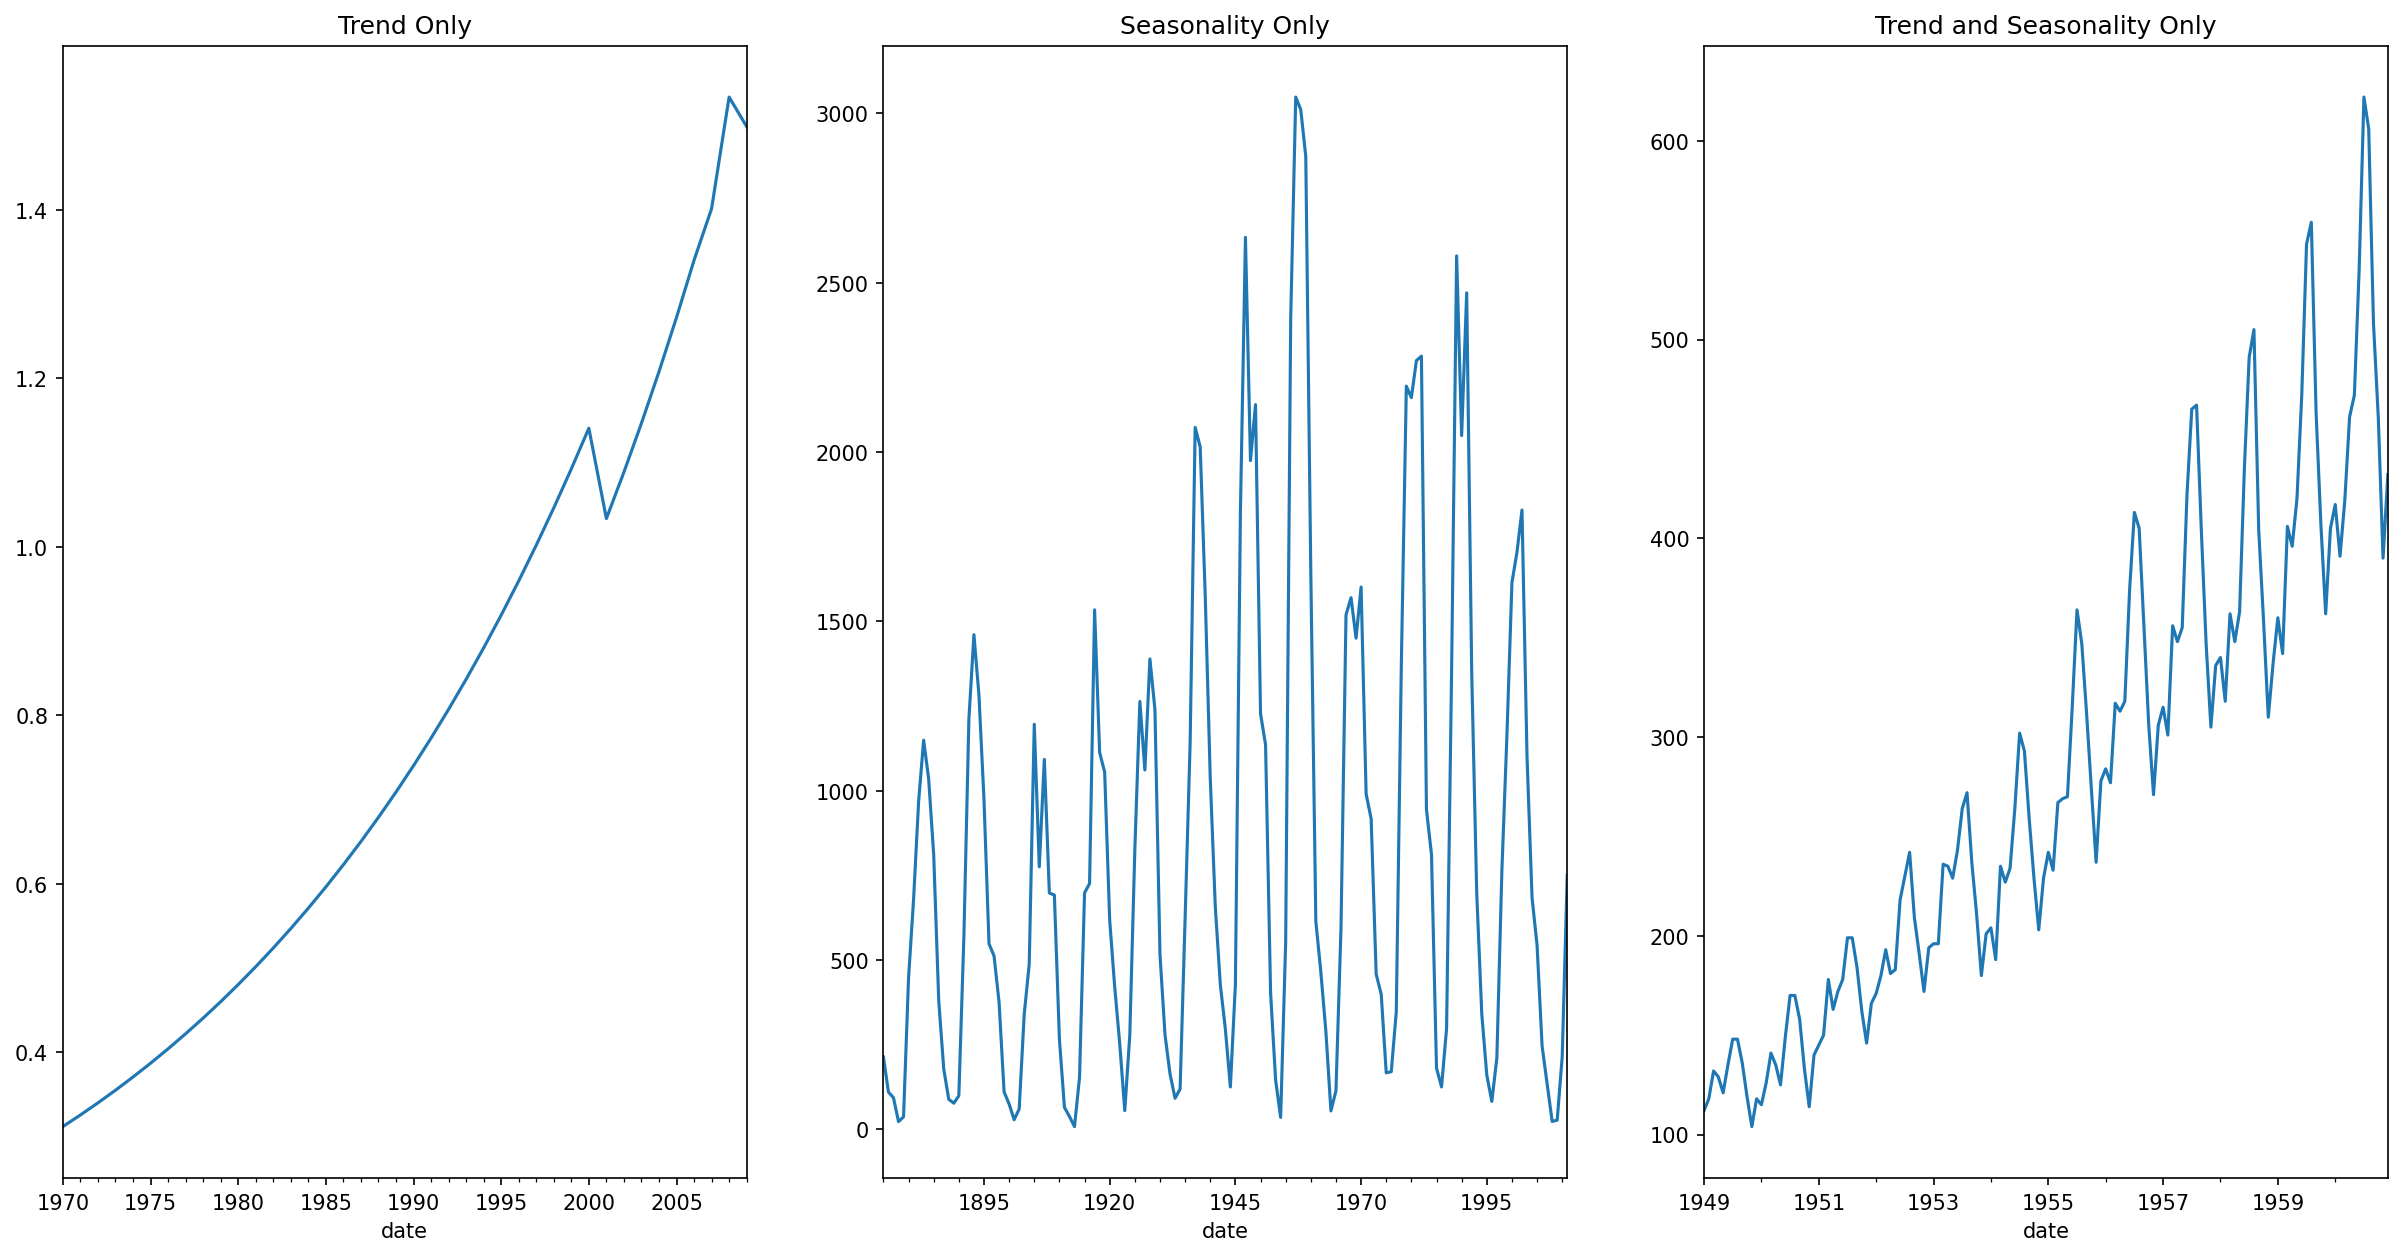

In [6]:
fig,axe = plt.subplots(1,3,figsize=(20,10),dpi=150)
dftrend = pd.read_csv('trendOnly.csv',parse_dates=['date'],index_col='date')
dfSeason = pd.read_csv('seasonality.csv',parse_dates=['date'],index_col='date')
dfTrendSeason = pd.read_csv('trendSeasonality.csv',parse_dates=['date'],index_col='date')
dftrend.plot(title='Trend Only',legend=False,ax=axe[0])
dfSeason.plot(title='Seasonality Only',legend=False,ax=axe[1])
dfTrendSeason.plot(title='Trend and Seasonality Only',legend=False,ax=axe[2])

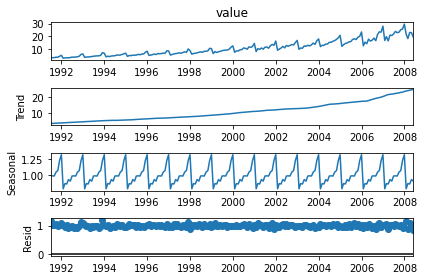

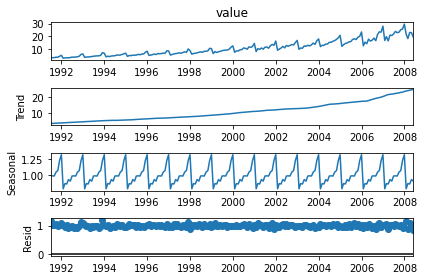

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
df =  pd.read_csv('time.csv',parse_dates=['date'],index_col='date')
mul = seasonal_decompose(df['value'],model='multiplicative',extrapolate_trend='freq')
#add = seasonal_decompose(df['values'],model='additive',extrapolate_trend='freq')

mul.plot()

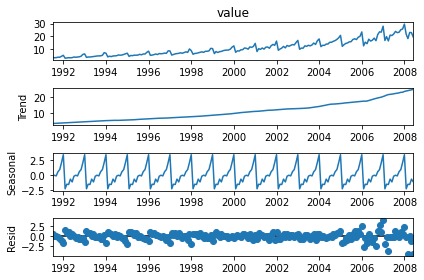

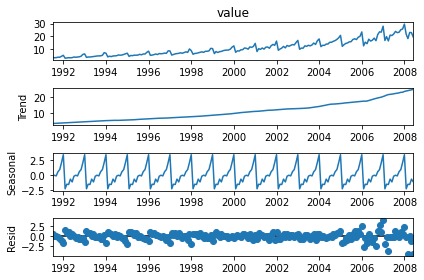

In [8]:
add = seasonal_decompose(df['value'],model='additive',extrapolate_trend='freq')

add.plot()